In [7]:
import matplotlib
#matplotlib.use('Agg')
%matplotlib tk
%autosave 180

%load_ext autoreload
%reload_ext autoreload
%autoreload 2

# 
import sys
sys.path.append("..") # Adds higher directory to python modules path.
import h5py
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import CCA
import torch
import time
import warnings
warnings.filterwarnings("ignore")
from locanmf import LocaNMF
import postprocess

Autosaving every 180 seconds
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
##################################################################################################################
## PARAMETERS THAT YOU SHOULD CHANGE
##################################################################################################################
# Path to data and atlas
mouse_name = 'IJ1'
session_name = 'Mar3'
root_dir = '/media/cat/4TBSSD/yuki/yongxu/data/'
data_folder = root_dir+mouse_name+'/'+session_name+'/'


In [3]:
# spatial = np.load(data_folder+spatial_data_filename)
# # spatial_random = np.load(data_folder+random_spatial_data_filename)
# # spatial=np.concatenate(spatial_trial,spatial_random,axis=0)
# spatial = np.transpose(spatial,[1,0])
# denoised_spatial_name = np.reshape(spatial,[128,128,-1])

# temporal_trial = np.load(data_folder+temporal_data_filename)
# temporal_random = np.load(data_folder+random_temporal_data_filename)
# temporal=np.concatenate((temporal_trial,temporal_random),axis=0)
# temporal = np.transpose(temporal,[1,0,2])
# # denoised_temporal_name = np.reshape(temporal,[-1,42*601])
# denoised_temporal_name = np.reshape(temporal,[-1,temporal.shape[1]*temporal.shape[2]])
# print('loaded data\n',flush=True)

# atlas = np.load('./'+atlas_filename)#['atlas'].astype(float)
# #areanames = sio.loadmat(data_folder+atlas_filename)['areanames']

In [5]:
d = np.load('/media/cat/4TBSSD/yuki/yongxu/data/IJ1/Mar3/locanmf_trial.npz')
temporal = d['temporal']
areas = d['areas']
names = d['names']
print (temporal.shape)
print (areas)
print (names)

(132, 16, 1801)
[-255 -249 -150  -57  -43  -36  -21  -15   15   21   36   43   57  150
  249  255]
['Retrosplenial area, dorsal part, layer 1 - right'
 'Retrosplenial area, lateral agranular part, layer 1 - right'
 'Primary visual area, layer 1 - right'
 'Primary somatosensory area, upper limb, layer 1 - right'
 'Primary somatosensory area, lower limb, layer 1 - right'
 'Primary somatosensory area, barrel field, layer 1 - right'
 'Secondary motor area, layer 1 - right'
 'Primary motor area, Layer 1 - right'
 'Primary motor area, Layer 1 - left'
 'Secondary motor area, layer 1 - left'
 'Primary somatosensory area, barrel field, layer 1 - left'
 'Primary somatosensory area, lower limb, layer 1 - left'
 'Primary somatosensory area, upper limb, layer 1 - left'
 'Primary visual area, layer 1 - left'
 'Retrosplenial area, lateral agranular part, layer 1 - left'
 'Retrosplenial area, dorsal part, layer 1 - left']


In [6]:
from scipy.signal import savgol_filter

t = np.arange(temporal.shape[2])/30 - 30
max_vals = []
for k in range(temporal.shape[1]):
    temp = temporal[:,k].mean(0)
    #plt.plot(temp)
    temp2 = savgol_filter(temp, 15, 2)
    
    plt.subplot(121)
    plt.xlim(-15,0)
    plt.plot(t,temp2)
    
    m = np.max(temp2[:temp2.shape[0]//2])
    max_vals.append(m)
    
    plt.subplot(122)
    plt.xlim(-15,0)
    temp2 = temp2/np.max(temp2)
    plt.plot(t,temp2)
    
    #break
plt.show()

max_vals = np.array(max_vals)
args = np.argsort(max_vals)[::-1]
print (max_vals[args])
print (names[args])



[0.05625315 0.05180758 0.05115577 0.04961621 0.04658525 0.04355635
 0.03948382 0.03790749 0.03650551 0.03484949 0.02789505 0.02738658
 0.02535531 0.01954653 0.01381519 0.01039247]
['Primary somatosensory area, lower limb, layer 1 - left'
 'Primary somatosensory area, lower limb, layer 1 - right'
 'Primary somatosensory area, upper limb, layer 1 - left'
 'Primary motor area, Layer 1 - left'
 'Retrosplenial area, lateral agranular part, layer 1 - left'
 'Primary somatosensory area, upper limb, layer 1 - right'
 'Retrosplenial area, lateral agranular part, layer 1 - right'
 'Retrosplenial area, dorsal part, layer 1 - left'
 'Primary motor area, Layer 1 - right'
 'Retrosplenial area, dorsal part, layer 1 - right'
 'Secondary motor area, layer 1 - left'
 'Primary somatosensory area, barrel field, layer 1 - left'
 'Primary somatosensory area, barrel field, layer 1 - right'
 'Secondary motor area, layer 1 - right'
 'Primary visual area, layer 1 - right'
 'Primary visual area, layer 1 - left']

In [64]:
print (rois_ids)

[ 15  21  29  36  43  50  57  64  71 136 150 164 186 198 249 255 261 268
 275]


In [138]:
# temp componetns of behavior + control data vstacked
t_plot=temporal.transpose((1,0,2))

print (temporal.shape)

(7, 264, 1801)


In [139]:
# Plot the distribution of lambdas. OPTIONAL
# If lots of values close to the minimum, decrease lambda_init.
# If lots of values close to the maximum, increase maxiter_lambda or lambda_step.
plt.hist(locanmf_comps.lambdas.data.cpu(), 
         bins=torch.unique(locanmf_comps.lambdas.data).shape[0])

plt.show()
print(locanmf_comps.lambdas.data.cpu())

tensor([ 21.3821, 311.1507,  33.4096, 159.3091, 248.9205,  81.5663,  52.2024,
         81.5663,  52.2024,  33.4096,  26.7276, 127.4473, 101.9579,  13.6846,
        311.1507,  21.3821])


In [140]:
region_name=region_mats[2]
region_name.shape

region_name


(16,)

In [141]:
def parse_areanames_new(region_name,rois_name):
    areainds=[]; areanames=[];
    for i,area in enumerate(region_name):
        areainds.append(area)
        areanames.append(rois_name[np.where(rois_ids==np.abs(area))][0])
    sortvec=np.argsort(np.abs(areainds))
    areanames=[areanames[i] for i in sortvec]
    areainds=[areainds[i] for i in sortvec]
    return areainds,areanames


In [142]:
# Get area names for all components
areainds,areanames_all =parse_areanames_new(region_name,rois_name)
areanames_area=[]
for i,area in enumerate(areas):
    areanames_area.append(areanames_all[areainds.index(area)])
    

In [59]:
# Save results! - USE .NPZ File
print("LocaNMF completed successfully in "+ str(time.time()-t0_global) + "\n")
print("Results saved in "+data_folder+'locanmf_decomp_loc'+str(loc_thresh)+'.mat')

# Prefer to save c_p which is already converted
sio.savemat(data_folder+'locanmf_decomp_loc'+str(loc_thresh)+'.mat',
            {'C':C_reshape,
             'A':A_reshape,
             'lambdas':lambdas,
             'areas':areas,
             'r2_fit':r2_fit,
             'time_ests':time_ests,
             'areanames':areanames_area
            })


torch.cuda.empty_cache()

LocaNMF completed successfully in 87.10101079940796

Results saved in /media/cat/4TBSSD/yuki/yongxu/data/IJ1/Mar3/locanmf_decomp_loc75.mat


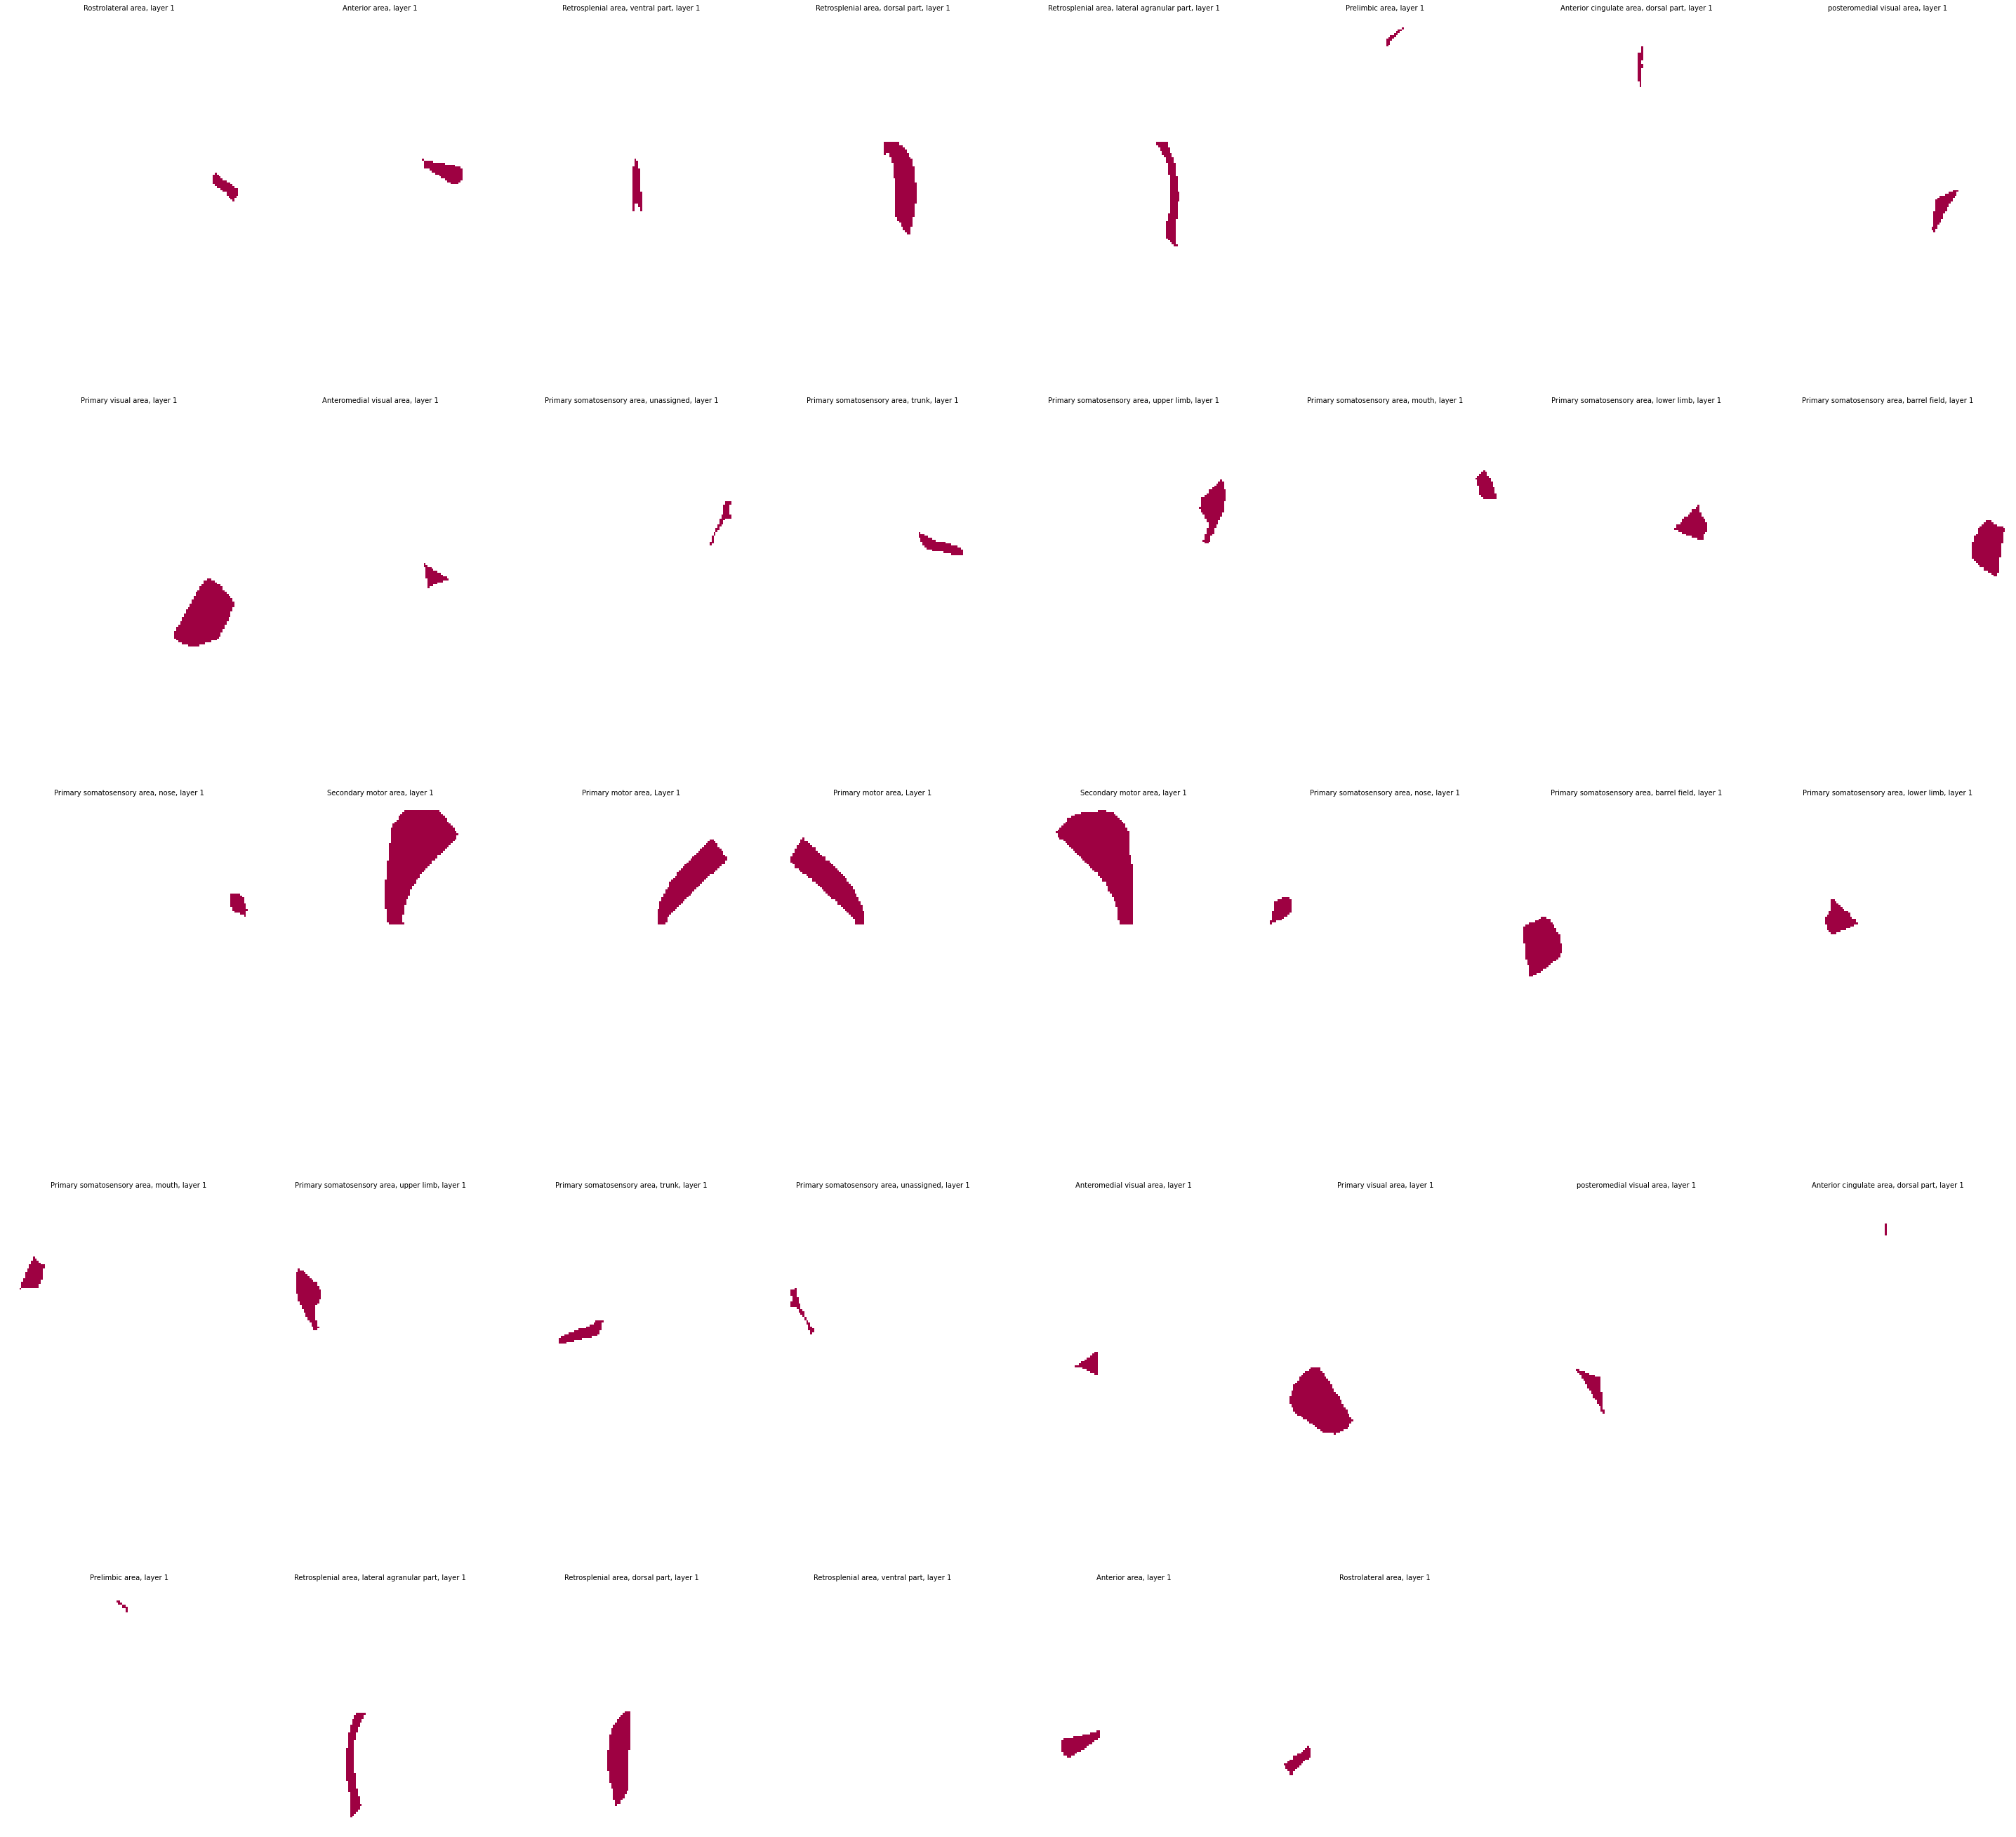

In [60]:
atlas_split=atlas
itt=0
fig=plt.figure(figsize=(40,40))
b_=[]
for it in np.unique(atlas_split):
    if np.abs(it) !=0:
        plotmap=np.zeros((atlas_split.shape)); plotmap.fill(np.nan); plotmap[atlas_split==it]=atlas_split[atlas_split==it]
        plt.subplot(5,8,itt+1)
        plt.imshow(plotmap,cmap='Spectral'); plt.axis('off'); 
        plt.title(rois_name[np.where(rois_ids==np.abs(it))][0],fontsize=10); 
        b_.append(plotmap)
        #     plt.show()
        itt=itt+1
plt.tight_layout(h_pad=0.5,w_pad=0.5)

In [61]:
# how much of the spatial component is inside the ROI
# per

tensor([75.5541, 80.5709, 78.6952, 80.5908, 78.9629, 79.1756, 98.9053, 81.9381,
        84.0245, 94.2150, 78.5193, 77.2639, 78.5326, 77.9467, 80.2672, 75.6619])

In [143]:
######################################################
##### PLACE TO LOOK FOR large spatial components #####
######################################################
fig=plt.figure()
for i in range(A_reshape.shape[2]):
    plt.subplot(5,8,i+1)
    plt.imshow(A_reshape[:,:,i])
    plt.title(areanames_area[i],fontsize=6)
plt.tight_layout(h_pad=0.5,w_pad=0.5)
plt.show()

In [144]:
# calculate ROI data
roi_spatial=np.zeros((A_reshape.shape[2],denoised_spatial_name.shape[2]))
for i in range(denoised_spatial_name.shape[2]):
    for j in range(A_reshape.shape[2]):
        A_masking=np.zeros((A_reshape[:,:,j].shape))
        A_masking[A_reshape[:,:,j]!=0]=1
        A_multiply=A_masking*denoised_spatial_name[:,:,i]
        roi_spatial[j,i]=np.sum(A_multiply)/np.sum(A_masking)
        
roi_data=[]
for s in range(temporal_trial.shape[0]):
    roi_each=roi_spatial@temporal_trial[s]
    roi_data.append(roi_each)
roi_save_trial=np.array(roi_data)
roi_save_trial.shape

(132, 16, 1801)

In [145]:
roi_spatial=np.zeros((A_reshape.shape[2],denoised_spatial_name.shape[2]))
for i in range(denoised_spatial_name.shape[2]):
    for j in range(A_reshape.shape[2]):
        A_masking=np.zeros((A_reshape[:,:,j].shape))
        A_masking[A_reshape[:,:,j]!=0]=1
        A_multiply=A_masking*denoised_spatial_name[:,:,i]
        roi_spatial[j,i]=np.sum(A_multiply)/np.sum(A_masking)
        
roi_data=[]
for s in range(temporal_random.shape[0]):
    roi_each=roi_spatial@temporal_random[s]
    roi_data.append(roi_each)
roi_save_random=np.array(roi_data)
roi_save_random.shape

(132, 16, 1801)

In [70]:
# save ROI data
# np.save(save_folder+save_name+'trial.npy',roi_save_trial)
# np.save(save_folder+save_name+'random.npy',roi_save_random)

# Visualization of components

In [146]:
# Spatial and Temporal Components: Summary
atlascolor=np.zeros((atlas.shape[0],atlas.shape[1],4))
A_color=np.zeros((A_reshape.shape[0],A_reshape.shape[1],4))
cmap=plt.cm.get_cmap('jet')
colors=cmap(np.arange(len(areainds))/len(areainds))
for i,area_i in enumerate(areainds):
    if area_i not in areas:
        continue
    atlascolor[atlas==area_i,:]=colors[i,:]
    C_area=C[np.where(areas==area_i)[0],:]
    for j in np.arange(colors.shape[1]):
        A_color[:,:,j]=A_color[:,:,j]+colors[i,j]*A_reshape[:,:,np.where(areas==area_i)[0][0]]
fig=plt.figure(figsize=(15,8))
ax1=fig.add_subplot(2,2,1)
ax1.imshow(atlascolor)
ax1.set_title('Atlas Regions')
ax1.axis('off')
ax2=fig.add_subplot(2,2,3)
ax2.imshow(A_color)
ax2.set_title('Spatial Components (One per region)')
ax2.axis('off')
ax3=fig.add_subplot(1,2,2)
axvar=0
for i,area_i in enumerate(areainds):
    if area_i not in areas:
        continue
    C_area=C[np.where(areas==area_i)[0][0],:min(1000,C.shape[1])]
    ax3.plot(1.5*axvar+C_area/np.nanmax(np.abs(C_area)),color=colors[i,:])
    axvar+=1
ax3.set_title('Temporal Components (One per region)')
ax3.axis('off') 
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [72]:
# Plotting all the regions' components
for i,area in enumerate(areas):
    try:
        fig=plt.figure(figsize=(20,4))
        ax1 = fig.add_subplot(1,3,1)
        plotmap_area = np.zeros((atlas.shape));
        plotmap_area.fill(np.nan);
        plotmap_area[brainmask] = atlas[brainmask]==area
        ax1.imshow(plotmap_area);
        ax1.set_title('Atlas '+areanames_area[i])
        ax1.axis('off')

        ax2 = fig.add_subplot(1,3,2)
        ax2.imshow(A_reshape[:,:,i])
        ax2.set_title('LocaNMF A [%s]'%(i+1))
        ax2.axis('off')

        ax3 = fig.add_subplot(1,3,3)
        ax3.plot(C[i,:min(1000,C.shape[1])],'k')
        if simulation:
            ax3.plot(V[np.where(area==trueareas)[0][0],:min(1000,V.shape[1])],'r');
            if i==0: ax3.legend(('LocaNMF','True'))
        ax3.set_title('LocaNMF C [%s]'%(i+1))
        ax3.axis('off')
        plt.show()
    except:
        pass


In [73]:
# Calculate Canonical Correlations between components in each pair of regions
corrmat=np.zeros((len(areainds),len(areainds)))
skipinds=[]
for i,area_i in enumerate(areainds):
    for j,area_j in enumerate(areainds):
        if i==0 and area_j not in areas:
            skipinds.append(j)
        C_i=C[np.where(areas==area_i)[0],:].T
        C_j=C[np.where(areas==area_j)[0],:].T
        if i not in skipinds and j not in skipinds:
            cca=CCA(n_components=1)
            cca.fit(C_i,C_j)
            C_i_cca,C_j_cca=cca.transform(C_i,C_j)
            try: C_i_cca=C_i_cca[:,0]
            except: pass
            try: C_j_cca=C_j_cca[:,0]
            except: pass               
            corrmat[i,j]=np.corrcoef(C_i_cca,C_j_cca)[0,1]
corrmat=np.delete(corrmat,skipinds,axis=0); 
corrmat=np.delete(corrmat,skipinds,axis=1);
corr_areanames=np.delete(areanames_all,skipinds)

In [75]:
# Plot correlations
fig=plt.figure()
plt.imshow(corrmat,cmap=plt.cm.get_cmap('jet')); plt.clim(-1,1); plt.colorbar(shrink=0.8)
plt.get_cmap('jet')
plt.xticks(ticks=np.arange(len(areainds)-len(skipinds)),labels=corr_areanames,rotation=90); 
plt.yticks(ticks=np.arange(len(areainds)-len(skipinds)),labels=corr_areanames); 
plt.title('CCA between all regions',fontsize=12)
plt.xlabel('Region i',fontsize=12)
plt.ylabel('Region j',fontsize=12)
plt.show()

In [68]:
# Save visualized components and correlations
# print('Saving postprocessing results!')
# postprocess.plot_components(A_reshape,C,areas,atlas,areanames,data_folder)
# postprocess.plot_correlations(A_reshape,C,areas,atlas,areanames,data_folder)